In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)


x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


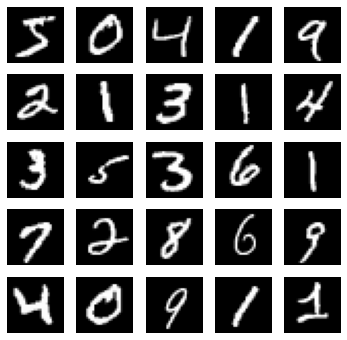

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for index in range(25):
  plt.subplot(5, 5, index + 1)
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')

plt.show()

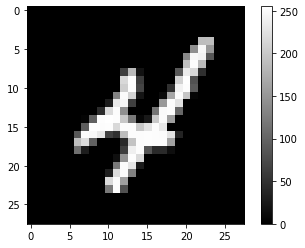

In [ ]:
plt.imshow(x_train[9], cmap='gray')
plt.colorbar()
plt.show()

In [ ]:

x_train = x_train / 255.0
x_test = x_test / 255.0

print('train max = ', x_train[0].max(), ', train min = ', x_train[0].min())
print('test max = ', x_train[0].max(), ', test min = ', x_train[0].min())


train max =  1.0 , train min =  0.0
test max =  1.0 , test min =  0.0


In [ ]:
t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)

print('train label = ', t_train[0],', decimal value = ', np.argmax(t_train[0]))
print('test label = ', t_test[0], ', decimal value = ', np.argmax(t_test[0]))

train label =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] , decimal value =  5
test label =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , decimal value =  7


In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))

model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 8s 3ms/step - loss: 0.7348 - accuracy: 0.8166 - val_loss: 0.3844 - val_accuracy: 0.9009
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3694 - accuracy: 0.8983 - val_loss: 0.3140 - val_accuracy: 0.9138
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3166 - accuracy: 0.9106 - val_loss: 0.2810 - val_accuracy: 0.9205
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.9191 - val_loss: 0.2590 - val_accuracy: 0.9279
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2650 - accuracy: 0.9253 - val_loss: 0.2439 - val_accuracy: 0.9324
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2470 - accuracy: 0.9306 - val_loss: 0.2284 - val_accuracy: 0.9368
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2316 - accuracy: 0.9346 - val_loss: 0.2193 - val_accuracy:

In [ ]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1128 - accuracy: 0.9679


[0.11280174553394318, 0.9678999781608582]

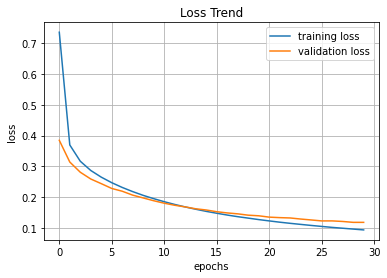

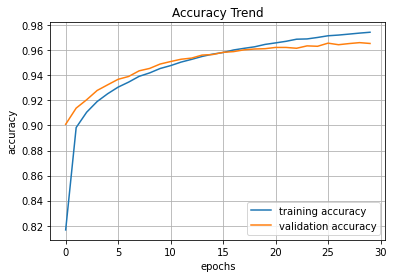

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()


plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

In [ ]:
pred = model.predict(x_test)

print(pred.shape)

print(pred[:5])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[1.5787489e-05 2.4105516e-08 2.4905172e-04 1.2403204e-03 4.9091938e-08
  6.5962031e-06 3.9598582e-09 9.9842167e-01 1.5945125e-05 5.0591316e-05]
 [6.3288477e-05 4.8608519e-05 9.9885952e-01 9.1230852e-04 9.8346990e-11
  1.4964076e-05 6.3376006e-05 5.7156904e-11 3.7904039e-05 4.6652621e-10]
 [1.1370077e-05 9.8979443e-01 2.3582049e-03 8.9145068e-04 2.8225806e-04
  5.7275232e-04 4.5339303e-04 3.0993114e-03 2.4580641e-03 7.8804384e-05]
 [9.9953806e-01 1.8862186e-08 2.0109760e-04 1.7878579e-05 4.6850701e-07
  1.3491921e-05 1.1673652e-04 1.0390378e-04 2.0008628e-07 8.0854898e-06]
 [4.0158245e-04 1.4378915e-07 3.2251261e-04 7.1905174e-06 9.6429449e-01
  1.0518211e-04 2.4266714e-04 5.1321753e-04 5.1640836e-04 3.3596586e-02]]
